Summarizing Distributions with the Mean

In [1]:
distribution = [0,2,3,3,3,4,13]
mean = sum(distribution) / len(distribution)
center = False

above = []
below = []

for value in distribution:
    if value < mean:
        below.append(mean - value)
    if value > mean:
        above.append(value - mean)
        
equal_distances = (sum(above) == sum(below))

print(equal_distances)

True


In [2]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1

In [3]:
print(equal_distances)

5000


In [4]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

mean_1 = mean(distribution_1)
mean_2 = mean(distribution_2)
mean_3 = mean(distribution_3)

print(mean_1)
print(mean_2)
print(mean_3)

27.25
46.857142857142854
8.714285714285714


In [8]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

houses = pd.read_table('AmesHousing_1.txt')

# every column that describes years is measured on an interval scale
# `SalePrice` is measured on a ratio scale
# The data set has less values than the initial one with 3970 rows 
# we don't know whether it represents a population

In [6]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
houses.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [10]:
houses.shape

(2930, 82)

In [11]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)
function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()
means_are_equal = (function_mean == pandas_mean)

In [12]:
print(means_are_equal)

True


In [13]:
print(function_mean)

180796.0600682594


Text(0, 0.5, 'Sampling error')

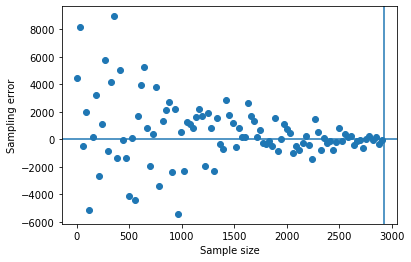

In [14]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size , random_state = i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size += 29
    
import matplotlib.pyplot as plt
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

(0, 500000)

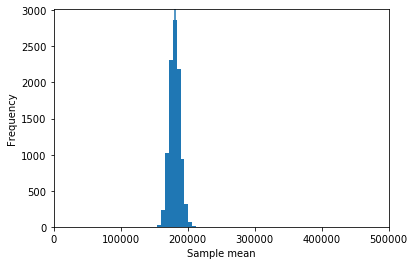

In [15]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(100, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

In [16]:
population = [3, 7, 2]
samples = [[3, 7], [3, 2],
           [7, 2], [7, 3],
           [2, 3], [2, 7]
          ]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)
print(unbiased)

True


Dist with even n of values

In [19]:
# Sort the values
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

# Find the median
middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()
print(median)

6.0


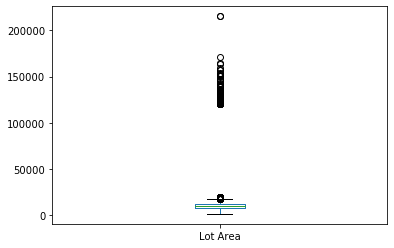

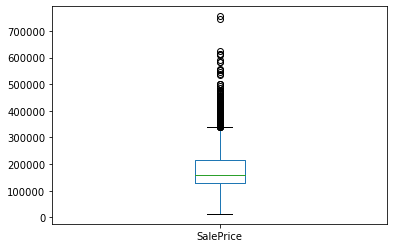

In [20]:
houses['Lot Area'].plot.box()
plt.show()
houses['SalePrice'].plot.box()
plt.show()

lotarea_difference = houses['Lot Area'].mean() - houses['Lot Area'].median()
saleprice_difference = houses['SalePrice'].mean() - houses['SalePrice'].median()

In [21]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


'\nThe mean seems more representative and more informative because it captures the\nfact that there are more houses rated above 5 than rated under 5. Because of this,\nthe mean is slightly shifted above 5. \n'

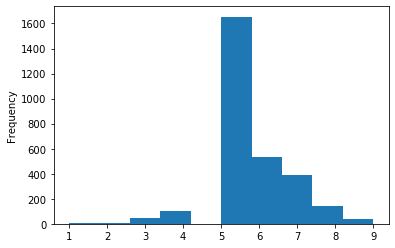

In [22]:
mean = houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()

houses['Overall Cond'].plot.hist()
more_representative = 'mean' 

'''
The mean seems more representative and more informative because it captures the
fact that there are more houses rated above 5 than rated under 5. Because of this,
the mean is slightly shifted above 5. 
'''

In [23]:
print(houses['Land Slope'].unique())

['Gtl' 'Mod' 'Sev']


In [24]:
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return max(counts, key = counts.get)

mode_function = mode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()
same = (mode_function == mode_method)

print(mode_method)

0    Gtl
dtype: object


In [27]:
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return (max(counts, key = counts.get),
            counts
           )

mode, value_counts = mode(houses['Roof Style'])


In [28]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64


In [30]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())
print(houses['Bedroom AbvGr'].value_counts().sort_index())

bedroom_mode = houses['Bedroom AbvGr'].mode()
print(bedroom_mode)

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64
0       8
1     112
2     743
3    1597
4     400
5      48
6      21
8       1
Name: Bedroom AbvGr, dtype: int64
0    3
dtype: int64


In [31]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [32]:
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()

print(mean, median)

180796.0600682594 160000.0


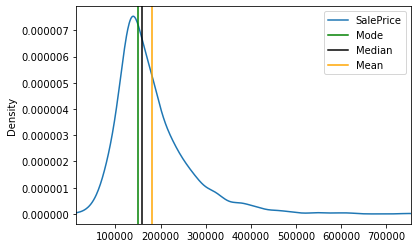

In [33]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

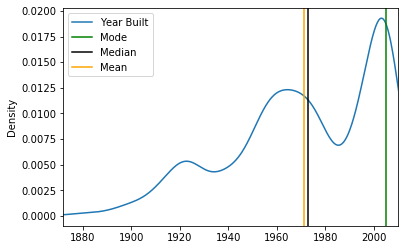

In [40]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),
                                     houses['Year Built'].max()
                                    )
                            )
plt.axvline(2005, color = 'Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

In [38]:
print(houses['Year Built'].mode())

0    2005
dtype: int64


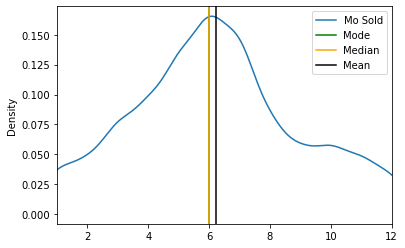

In [41]:
houses['Mo Sold'].plot.kde(xlim = [1,12])


plt.axvline(houses['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()

In [49]:
fr = (2000, 2008, 1967, 2018)

def find_range(array):
    return max(array) - min(array)

range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])
    
print(find_range(fr))

51


In [44]:
C = [1,1,1,1,1,1,1,1,1,21]
def average_distance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        distances.append(value - reference_point)
        
    return sum(distances) / len(distances)

avg_distance = average_distance(C)
print(avg_distance)

0.0


In [47]:
def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)
        
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)
print(mad)

3.6


In [48]:
C = [1,1,1,1,1,1,1,1,1,21]

def variance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    return sum(distances) / len(distances)

variance_C = variance(C)
print(variance_C)

36.0


In [50]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

standard_deviation_C = standard_deviation(C)
print(standard_deviation_C)

6.0


Avg variability around the mean

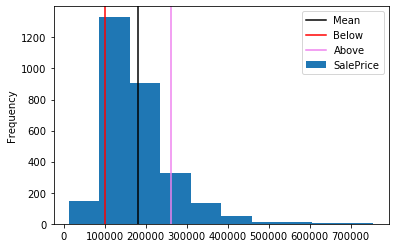

In [51]:
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

In [52]:
C = [1,1,1,1,1,1,1,1,1,21]

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

print(standard_deviation(C))

6.0


In [53]:
# Measure first the variability for each year
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Get years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

print(greatest_variability, lowest_variability)

2006 2010


In [54]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


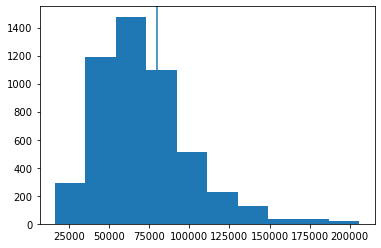

In [55]:
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

In [56]:
print(sum(st_devs) / 5000) #st_devs - a list with all the 5000 st. deviations

71303.64762671624


In [57]:
print(standard_deviation(houses['SalePrice']))

79873.05865192247


So we can say that the sample standard deviation underestimates _on average_ the population standard deviation.

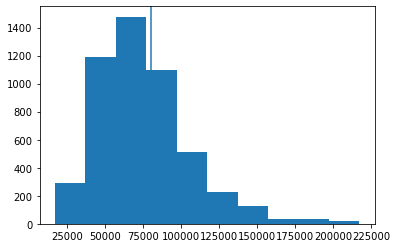

In [59]:
from math import sqrt
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)

pop_stdev = standard_deviation(houses['SalePrice'])
#plt.hist(st_devs)
#plt.axvline(pop_stdev)
from math import sqrt

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(pop_stdev)

In [60]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var
pandas_stdev = sample['SalePrice'].std(ddof = 1) # default ddof = 1
numpy_stdev = std(sample['SalePrice'], ddof = 1) # default ddof = 0
equal_stdevs = pandas_stdev == numpy_stdev

pandas_var = sample['SalePrice'].var(ddof = 1) # default ddof = 1
numpy_var = var(sample['SalePrice'], ddof = 1) #default ddof = 0
equal_vars = pandas_var == numpy_var

print(pandas_var)

5847530082.515158


In [61]:
print(houses['SalePrice'].sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


In [62]:
print(houses['SalePrice'].mean())

180796.0600682594


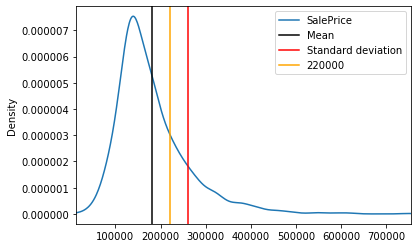

In [63]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                    )
                            )

st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

In [64]:
distance = 220000 - houses['SalePrice'].mean()
st_devs_away = distance / houses['SalePrice'].std(ddof = 0)

Using Z-scores

In [65]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

In [66]:
# Locating values in diff Distr

 # Segment the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Find the location with the z-score closest to 0
print(z_by_location)
best_investment = 'College Creek'

{'NAmes': 1.7239665910370237, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': -0.5186390646965722}


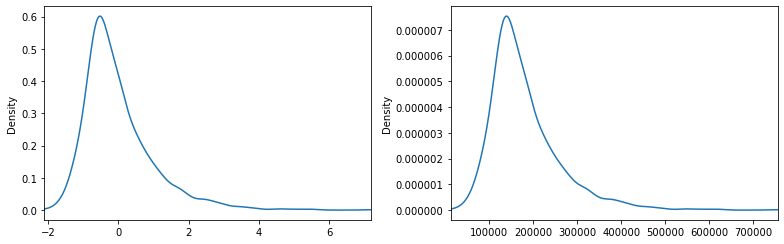

In [67]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partiall

In [68]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)
# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_area) / stdev_area)
    )

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)

In [70]:
from numpy import std, mean
population = [0,8,0,8]

mean_pop = mean(population)
stdev_pop = std(population, ddof = 0)

standardized_pop = []
for value in population:
    z = (value - mean_pop) / stdev_pop
    standardized_pop.append(z)
    
mean_z = mean(standardized_pop)
stdev_z = std(standardized_pop, ddof = 0)
print(stdev_z)

1.0


In [71]:
mean_index1 = houses['index_1'].mean()
stdev_index1 = houses['index_1'].std(ddof = 0)
houses['z_1'] = houses['index_1'].apply(lambda x: 
                                      (x - mean_index1) / stdev_index1
                                     )

mean_index2 = houses['index_2'].mean()
stdev_index2 = houses['index_2'].std(ddof = 0)
houses['z_2'] = houses['index_2'].apply(lambda x: 
                                      (x - mean_index2) / stdev_index2
                                     )

print(houses[['z_1', 'z_2']].head(2))

KeyError: 'index_1'